In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [84]:
def prep_data(df):
    only_valid_bmi = df[~df.isna().apply(lambda x: any(x), axis=1)]
    df = only_valid_bmi
    one_hot = pd.get_dummies(df)
    X = one_hot.drop(['id', 'stroke'], axis=1)
    y = one_hot['stroke'].values
    return train_test_split(X, y)

In [8]:
pipe = Pipeline([('scaling', StandardScaler()), ('dim_reduction', PCA()), ('clf', RandomForestClassifier())])

param_grid = {'clf': [RandomForestClassifier(), SVC()], 
              'dim_reduction__n_components': [20, 15,10]
             # ,'clf__n_components': [5,10,20]
             }

grid = GridSearchCV(pipe, param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('dim_reduction', PCA()),
                                       ('clf', RandomForestClassifier())]),
             param_grid={'clf': [RandomForestClassifier(), SVC()],
                         'dim_reduction__n_components': [20, 15, 10]})

In [9]:
pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_dim_reduction__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.090716,0.009284,0.041809,0.001896,SVC(),20,"{'clf': SVC(), 'dim_reduction__n_components': 20}",0.956581,0.957880,0.957880,0.956522,0.956522,0.957077,0.000656,1
4,0.108840,0.004853,0.036920,0.003162,SVC(),15,"{'clf': SVC(), 'dim_reduction__n_components': 15}",0.956581,0.957880,0.957880,0.956522,0.956522,0.957077,0.000656,1
5,0.109828,0.011050,0.032480,0.003293,SVC(),10,"{'clf': SVC(), 'dim_reduction__n_components': 10}",0.956581,0.957880,0.957880,0.956522,0.956522,0.957077,0.000656,1
0,0.579233,0.027342,0.015680,0.000573,RandomForestClassifier(),20,"{'clf': RandomForestClassifier(), 'dim_reducti...",0.956581,0.956522,0.956522,0.953804,0.953804,0.955447,0.001341,4
1,0.556519,0.029654,0.013960,0.000482,RandomForestClassifier(),15,"{'clf': RandomForestClassifier(), 'dim_reducti...",0.956581,0.955163,0.956522,0.953804,0.952446,0.954903,0.001597,5
2,0.544898,0.019632,0.014040,0.000253,RandomForestClassifier(),10,"{'clf': RandomForestClassifier(), 'dim_reducti...",0.957938,0.953804,0.956522,0.952446,0.953804,0.954903,0.002014,6


In [10]:
grid.score(X_test, y_test)

0.9584690553745928

In [11]:
for pair in zip(grid.best_estimator_.decision_function(X_test), grid.best_estimator_.predict(X_test)):
    if pair[1]==1:
        print(pair)

In [12]:
from sklearn.metrics import roc_curve
scores = grid.best_estimator_.decision_function(X_test)
roc = roc_curve(y_test, scores)

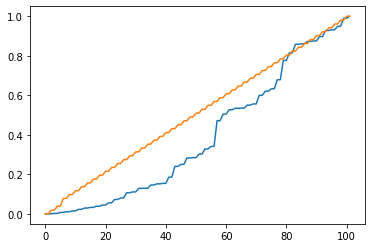

In [13]:
import matplotlib.pyplot as plt
plt.plot(roc[0])
plt.plot(roc[1])

In [17]:
stroke_df = df[df['stroke']==1]

In [54]:
non_stroke_df = df[df['stroke']==0]
non_stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [98]:
def fit_model(X, y):
    rf = RandomForestClassifier()
    rf.fit(X,y)
    return rf

In [35]:
from sklearn.metrics import roc_auc_score
scores = rf.predict_proba(X_test)[:, 1]
scores

array([0.  , 0.  , 0.  , ..., 0.01, 0.33, 0.07])

In [36]:
roc_auc_score(y_test, scores)

0.7696536558548652

In [39]:
roc = roc_curve(y_test, scores)

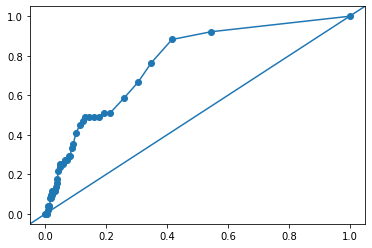

In [50]:
import numpy as np

plt.scatter(roc[0], roc[1])
plt.plot(roc[0], roc[1])
plt.axline([0, 0], [1, 1])

In [57]:
display(stroke_df, non_stroke_df)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
243,40460,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [99]:
models = []
for split in range(len(non_stroke_df)//len(stroke_df)):
    combined = pd.concat([non_stroke_df.sample(len(stroke_df)), stroke_df])
    X_train, X_test, y_train, y_test = prep_data(combined)
    models.append(fit_model(X_train, y_train))

In [100]:
models[0].predict(X_test.iloc[0].values.reshape(1,-1))

array([1])